## 1. Overview of the dataframe

In [1]:
import pandas 
data = pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])

In [2]:
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [3]:
data.shape

(45000, 4)

In [4]:
data.columns

Index(['Course Name', 'Timestamp', 'Rating', 'Comment'], dtype='object')

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

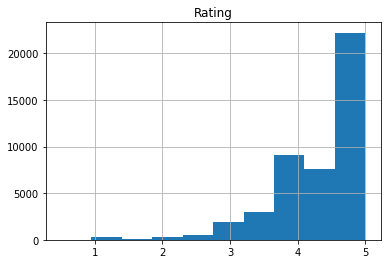

In [5]:
data.hist("Rating")

## 2. Selecting data from the dataframe

### Select a column

In [6]:
data["Rating"]

0        4.0
1        4.0
2        4.0
3        5.0
4        4.5
        ... 
44995    4.0
44996    5.0
44997    5.0
44998    5.0
44999    5.0
Name: Rating, Length: 45000, dtype: float64

In [7]:
data["Rating"].mean()

4.442155555555556

### Select multiple columns

In [8]:
data[["Course Name", "Rating"]]

,Course Name,Rating
0,The Python Mega Course: Build 10 Real World Ap...,4.0
1,The Python Mega Course: Build 10 Real World Ap...,4.0
2,The Python Mega Course: Build 10 Real World Ap...,4.0
3,The Python Mega Course: Build 10 Real World Ap...,5.0
4,The Python Mega Course: Build 10 Real World Ap...,4.5
...,...,...
44995,Python for Beginners with Examples,4.0
44996,The Python Mega Course: Build 10 Real World Ap...,5.0
44997,The Python Mega Course: Build 10 Real World Ap...,5.0
44998,Python for Beginners with Examples,5.0


In [9]:
type(data[["Course Name", "Rating"]])

pandas.core.frame.DataFrame

In [10]:
type(data["Rating"])

pandas.core.series.Series

### Select a row

In [11]:
data.iloc[3]

Course Name    The Python Mega Course: Build 10 Real World Ap...
Timestamp                              2021-04-02 03:33:24+00:00
Rating                                                       5.0
Comment                                                      NaN
Name: 3, dtype: object

In [12]:
type(data.iloc[3])

pandas.core.series.Series

### Selecting multiple rows

In [13]:
data.iloc[2:4]

,Course Name,Timestamp,Rating,Comment
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN


In [14]:
type(data.iloc[2:4])

pandas.core.frame.DataFrame

### Selecting a section

In [15]:
data[["Course Name", "Rating"]].iloc[2:4]

,Course Name,Rating
2,The Python Mega Course: Build 10 Real World Ap...,4.0
3,The Python Mega Course: Build 10 Real World Ap...,5.0


Selecting a cell

In [16]:
data["Rating"].iloc[2]

4.0

In [17]:
data.at[2, "Rating"]

4.0

## 3. Filtering Data based on conditions

### One condition

In [18]:
data[data["Rating"]>4]

,Course Name,Timestamp,Rating,Comment
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
5,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 01:10:06+00:00,4.5,NaN
6,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 00:44:54+00:00,4.5,NaN
7,The Python Mega Course: Build 10 Real World Ap...,2021-04-01 23:42:02+00:00,5.0,NaN
...,...,...,...,...
44994,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:19:24+00:00,5.0,NaN
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN


In [19]:
len(data[data["Rating"]>4])

29758

In [20]:
data[data["Rating"] > 4]["Rating"]

3        5.0
4        4.5
5        4.5
6        4.5
7        5.0
        ... 
44994    5.0
44996    5.0
44997    5.0
44998    5.0
44999    5.0
Name: Rating, Length: 29758, dtype: float64

In [21]:
data[data["Rating"] > 4]["Rating"].mean()

4.87316015861281

### Multiple conditions

In [22]:
data[(data["Rating"] > 4) & (data["Course Name"] == "The Complete Python Course: Build 10 Professional OOP Apps")]["Rating"].mean()

4.908831908831909

## 4. Time-based filtering

In [23]:
from datetime import datetime
from pytz import utc
data[(data["Timestamp"] >= datetime(2020,7,1,tzinfo=utc)) & (data["Timestamp"] <= datetime(2020,12,31,tzinfo=utc))]

,Course Name,Timestamp,Rating,Comment
3065,Interactive Data Visualization with Python and...,2020-12-30 23:28:34+00:00,3.0,NaN
3066,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 22:59:02+00:00,4.0,NaN
3067,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 22:40:10+00:00,4.5,NaN
3068,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 21:56:41+00:00,4.5,NaN
3069,The Python Mega Course: Build 10 Real World Ap...,2020-12-30 21:14:34+00:00,4.5,NaN
...,...,...,...,...
9729,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 03:09:44+00:00,3.5,NaN
9730,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 03:09:12+00:00,5.0,NaN
9731,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 02:40:58+00:00,4.0,NaN
9732,The Python Mega Course: Build 10 Real World Ap...,2020-07-01 02:04:02+00:00,5.0,nice


## 5. From data to information

### Average rating

In [24]:
data["Rating"].mean()

4.442155555555556

### Average rating for a particular course

In [25]:
data[data["Course Name"] == "Python for Beginners with Examples"]["Rating"].mean()

4.300974901472723

### Average rating for a particular period

In [26]:
data[(data["Timestamp"] >= datetime(2020,1,1,tzinfo=utc)) & (data["Timestamp"] <= datetime(2020,12,31,tzinfo=utc))]["Rating"].mean()

4.476541271662339

### Average rating for a particular period for a particular course

In [31]:
data[(data["Timestamp"] >= datetime(2020,1,1,tzinfo=utc)) & (data["Timestamp"] <= datetime(2020,12,31,tzinfo=utc)) & (data["Course Name"] == "Python for Beginners with Examples")]["Rating"].mean()

4.294915254237288

### Average of uncommented ratings

In [32]:
data[data["Comment"].isnull()]["Rating"].mean()

4.433679746603492

### Average of commented ratings 

In [33]:
data[data["Comment"].notnull()]["Rating"].mean()

4.489777908515959

### Number of uncommented ratings

In [36]:
data[data["Comment"].isnull()]["Rating"].count()

38201

### Number of commented ratings

In [37]:
data[data["Comment"].notnull()]["Rating"].count()

6799

### Number of comments containing a certain word

In [42]:
data[data["Comment"].str.contains("accent", na=False)]["Rating"].count()

77

### Average of commented ratings with "accent" in comment

In [43]:
data[data["Comment"].str.contains("accent", na=False)]["Rating"].mean()

3.8636363636363638